## DateTime Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

In [56]:
import pandas as pd

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# import datasets for this exercise
import vega_datasets
from vega_datasets import data




**1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [57]:
# import temps data frame
temps = data.sf_temps()
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [58]:
# Set date column as Index and sort the index:
temps = temps.set_index('date').sort_index()
temps.head(2)

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40


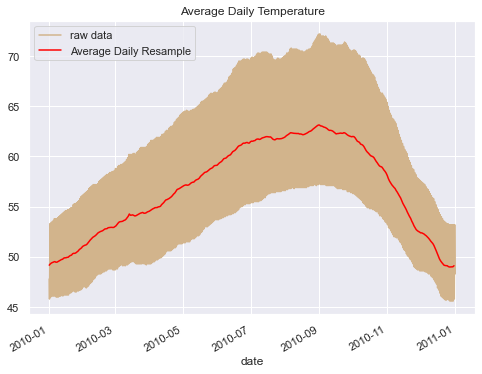

In [59]:
# visual average temperature by day

temps.temp.plot(label = 'raw data', color = 'tan')
temps.resample('D').mean().temp.plot(label = 'Average Daily Resample', color = 'red')
plt.title('Average Daily Temperature')
plt.legend();

**2. Write the code necessary to visualize the minimum temperature over time.**

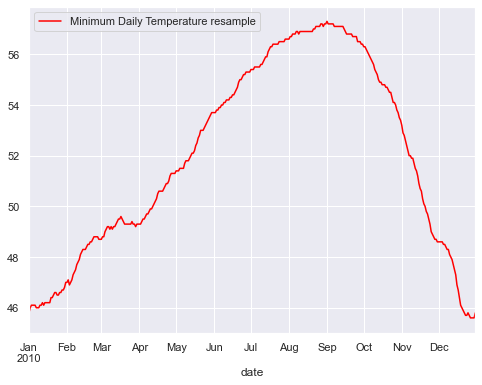

In [60]:
# visual minimum temperature by day
temps.resample('D').min().temp.plot(label = 'Minimum Daily Temperature resample', color = 'red')
plt.legend();

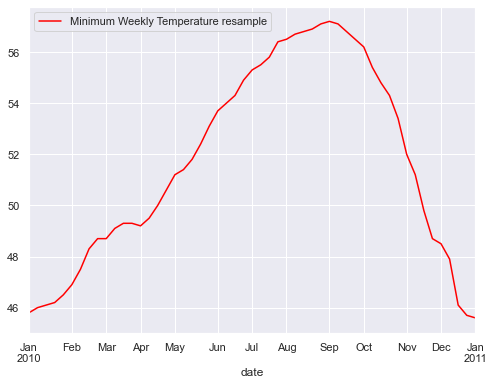

In [6]:
# visual minimum temperature by week
temps.resample('W').min().temp.plot(label = 'Minimum Weekly Temperature resample', color = 'red')
plt.legend();

**3. Write the code necessary to visualize the maximum temperature over time.**

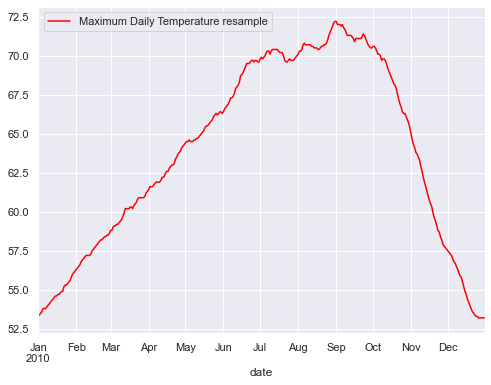

In [7]:
# visual maximum temperature by day
temps.resample('D').max().temp.plot(label = 'Maximum Daily Temperature resample', color = 'red')
plt.legend();

**4. Which month is the coldest, on average?  -- January**

In [27]:
# resample by month, using mean as aggregate
temps.resample('M').mean().sort_values(by = 'temp', ascending = True) 


,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


In [28]:
# A better way: use idxmin function to get the row label of the minimum value. 
temps.resample('M').mean().sort_values(by = 'temp', ascending = False) 

,temp
date,
2010-09-30,62.49
2010-08-31,62.41
2010-07-31,61.77
2010-06-30,60.44
2010-10-31,60.25
2010-05-31,57.97
2010-04-30,55.63
2010-11-30,55.19
2010-03-31,53.96


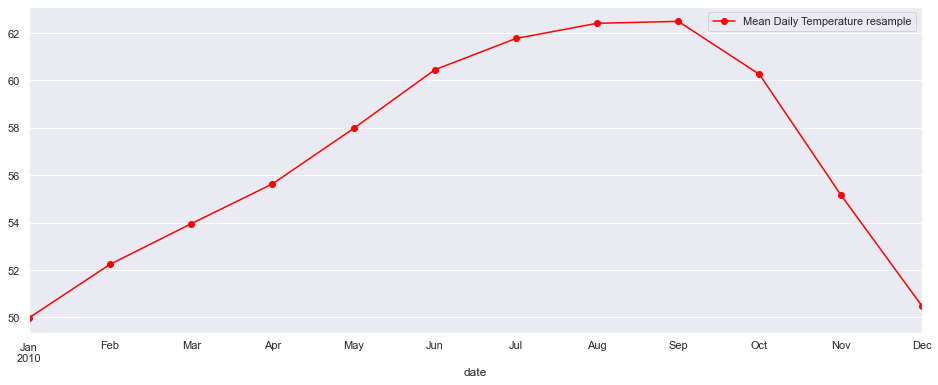

In [54]:
# visual minimum temperature by month
temps.resample('M').mean().temp.plot(label = 'Mean Daily Temperature resample', color = 'red', marker = 'o')
plt.legend();

**5. Which month has the highest average temperature?** -- September

In [11]:
# Attempt 1: use .agg to find maximum temp, then refer to df above to find month
temps.resample('M').mean().agg('max')  #September

temp   62.49
dtype: float64

In [12]:
# A better way use idxmax to get index label of the maximum mean value
temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

**6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [13]:
# Resample by day to find min and max temperatures
temps_var = temps.resample('D').agg(['min','max'])
temps_var.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, min)  365 non-null    float64
 1   (temp, max)  365 non-null    float64
dtypes: float64(2)
memory usage: 18.6 KB


In [14]:
#MultiIndex - remove temp level from multiindex column 
temps_var = temps_var.droplevel(axis = 1, level = 0)
temps_var.head(2)

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40


In [24]:
temps_var['variance'] = temps_var['max'] - temps_var['min']
temps_var.head(2)

,min,max,variance
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40


In [26]:
# Resample by Month
temps_var.resample('M').mean().sort_values(by = 'variance', ascending = False)  

,min,max,variance
date,,,
2010-09-30,56.90,71.31,14.40
2010-07-31,56.05,70.02,13.98
2010-06-30,54.48,68.43,13.95
2010-08-31,56.94,70.81,13.87
2010-10-31,54.93,68.36,13.43
2010-05-31,52.40,65.31,12.91
2010-04-30,50.33,62.65,12.32
2010-03-31,49.24,60.09,10.85
2010-11-30,50.78,61.01,10.24


**7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

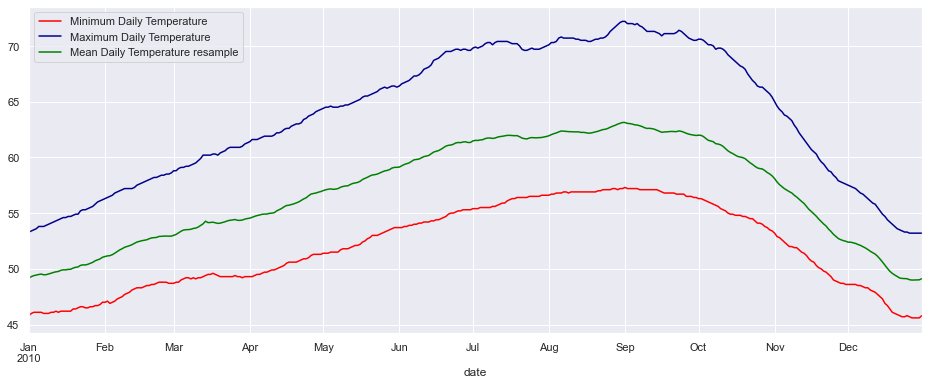

In [55]:
# resample daily
temps.resample('D').agg('min').temp.plot(label = 'Minimum Daily Temperature', color = 'red')
temps.resample('D').agg('max').temp.plot(label = 'Maximum Daily Temperature', color = 'darkblue')
temps.resample('D').mean().temp.plot(label = 'Mean Daily Temperature resample', color = 'green')
plt.legend()

### Seattle_Weather

from <br>
```vega_datasets import data```<br>
```data.seattle_weather()```<br>
**Use the dataset to answer the following questions:**

In [31]:
# import temps data frame
seattle = data.seattle_weather()
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [67]:
# Set date column as Index and sort the index:
seattle = seattle.set_index('date').sort_index()
seattle.weather.value_counts()

KeyError: "None of ['date'] are in the columns"

In [34]:
seattle.column

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

**- Which year and month combination has the highest amount of precipitation?**

In [61]:
# Resample by average monthly precipitation and sort precipitation in descending order
seattle.resample('M').sum().sort_values(by = 'precipitation', ascending = False).head()  

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60
2014-03-31,240.00,400.10,168.20,114.00
2015-11-30,212.60,290.50,104.40,106.40
2012-11-30,210.50,339.80,156.80,96.60
2012-03-31,183.00,296.20,88.00,131.70


**- Visualize the amount of monthly precipitation over time.**

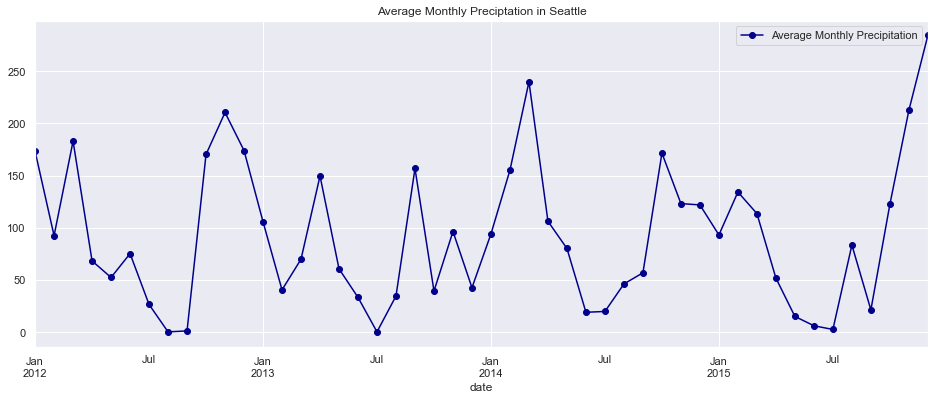

In [62]:
# visual average monthly preciptation by month
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('M').sum().precipitation.plot(label = 'Average Monthly Precipitation', color = 'darkblue', marker = 'o')
plt.title('Average Monthly Preciptation in Seattle')
plt.legend()
plt.show()

**- Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

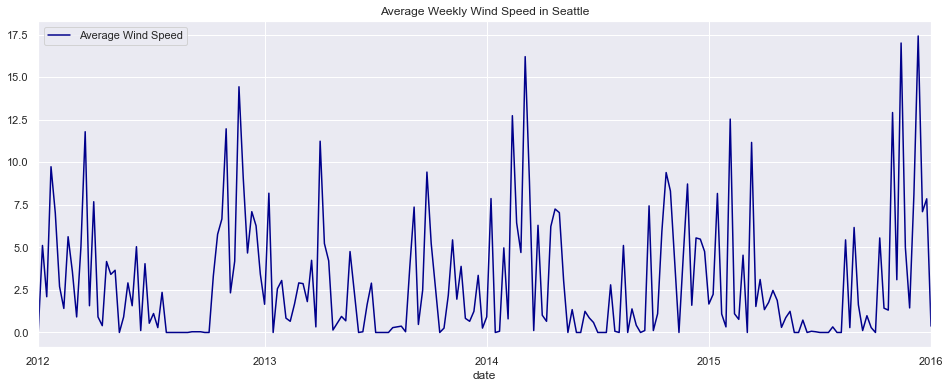

In [44]:
# visualize wind by week
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('W').mean().precipitation.plot(label = 'Average Wind Speed', color = 'darkblue')
plt.title('Average Weekly Wind Speed in Seattle')
plt.legend()
plt.show()

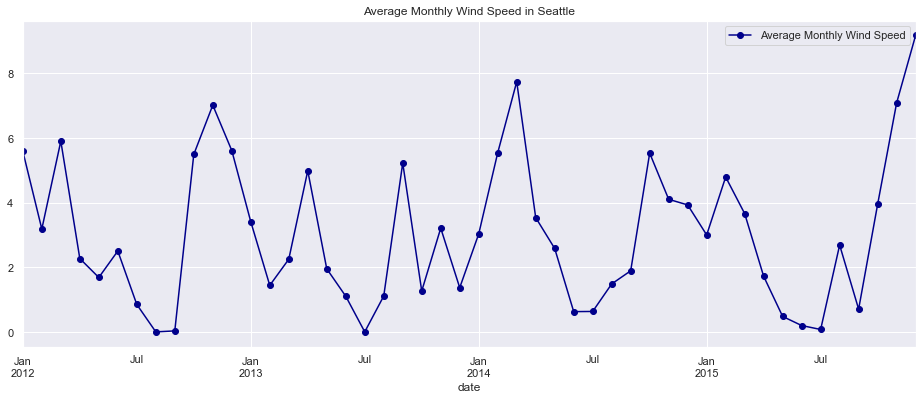

In [52]:
# visual wind by month
plt.rcParams["figure.figsize"] = (16,6)

seattle.resample('M').mean().precipitation.plot(label = 'Average Monthly Wind Speed', color = 'darkblue', marker = 'o')
plt.title('Average Monthly Wind Speed in Seattle')
plt.legend()
plt.show()

**- Which year-month combination is the windiest?**

In [47]:
# Resample by average monthly precipitation and sort precipitation in descending order
seattle.resample('M').mean().sort_values(by = 'wind', ascending = False).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.54,8.20,2.64,4.53
2015-12-31,9.18,8.38,3.83,4.34
2012-03-31,5.90,9.55,2.84,4.25
2014-11-30,4.10,11.03,4.51,3.98
2012-02-29,3.18,9.28,3.20,3.90


**- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [69]:
sunny = np.where(seattle[weather == sun, 1, 0])

NameError: name 'weather' is not defined

**- In which month does it rain the most?**

**- Which month has the most number of days with a non-zero amount of precipitation?**